<a href="https://colab.research.google.com/github/kongjann/car-eval.-ml/blob/main/car_evaluation_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

INTRODUCTION

Using the C5.0 decision tree algorithm, I build a Machine Learning classification model to facilitate consumer decision making by isolating satisfactory cars. 

I train a model to accurately identify substandard cars from better cars 98.6% of the time using characteristics such as price, comfort and estimated safety, among others.  

I also conduct some data analysis, using stacked bar graphs to investigate any patterns within the data. 

I used the Car Evaluation Data Set from the UCI Machine Learning Repository, in which the dataset of cars have already been labelled as "unacceptable", "acceptable", "good" and "very good". 

The purpose of this model is to aid consumer purchasing decisions. Consumers may sometimes fail to make the optimal purchasing decision due to the presence of imperfect information in imperfect markets, which is exacerbated by a large number of choices on the market. With this model, I hope to significantly reduce their choices by weeding out less optimal cars, hence reducing the inefficiencies caused by imperfect information in economic markets. 

PREPARATION

I install and load the relevant packages and download the data set.  

In [ ]:
install.packages("C50")
library(C50)

install.packages("gmodels")
library(gmodels)

install.packages("ggplot2")
library(ggplot2)

install.packages("GGally")
library(GGally)


car <- read.csv("https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data")

I create a new column in the dataset called "quality", in which "unacceptable" cars are classified as "bad" and the rest are classified as "good". 
 

In [60]:
car$quality[car$unacc == "acc"] <- "good"
car$quality[car$unacc == "good"] <- "good"
car$quality[car$unacc == "vgood"] <- "good"
car$quality[car$unacc == "unacc"] <- "bad"

I remove the "acceptabilty" column from the data set because the model would use the "acceptability" feature in prediction, causing a false 100% accuracy rate. Then I check the new data set.

In [ ]:
car_new <- subset(car, select = -c(unacc))
car_new

I relabel the column headers for easier understanding and check the dataset again. 

In [62]:
colnames(car_new) <- c("Price of car", "Cost of maintenance", 
                       "No. of doors", "No. of seats", 
                       "Size of boot", "Safety of car", "Quality")
car_new

,Price of car,Cost of maintenance,No. of doors,No. of seats,Size of boot,Safety of car,Quality
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<fct>
1,vhigh,vhigh,2,2,small,med,bad
2,vhigh,vhigh,2,2,small,high,bad
3,vhigh,vhigh,2,2,med,low,bad
4,vhigh,vhigh,2,2,med,med,bad
5,vhigh,vhigh,2,2,med,high,bad
6,vhigh,vhigh,2,2,big,low,bad
7,vhigh,vhigh,2,2,big,med,bad
8,vhigh,vhigh,2,2,big,high,bad
9,vhigh,vhigh,2,4,small,low,bad


DATA EXPLORATION

To visualise what proportion of the dataset is made of good and bad cars, we can use a bar chart and a pie chart!

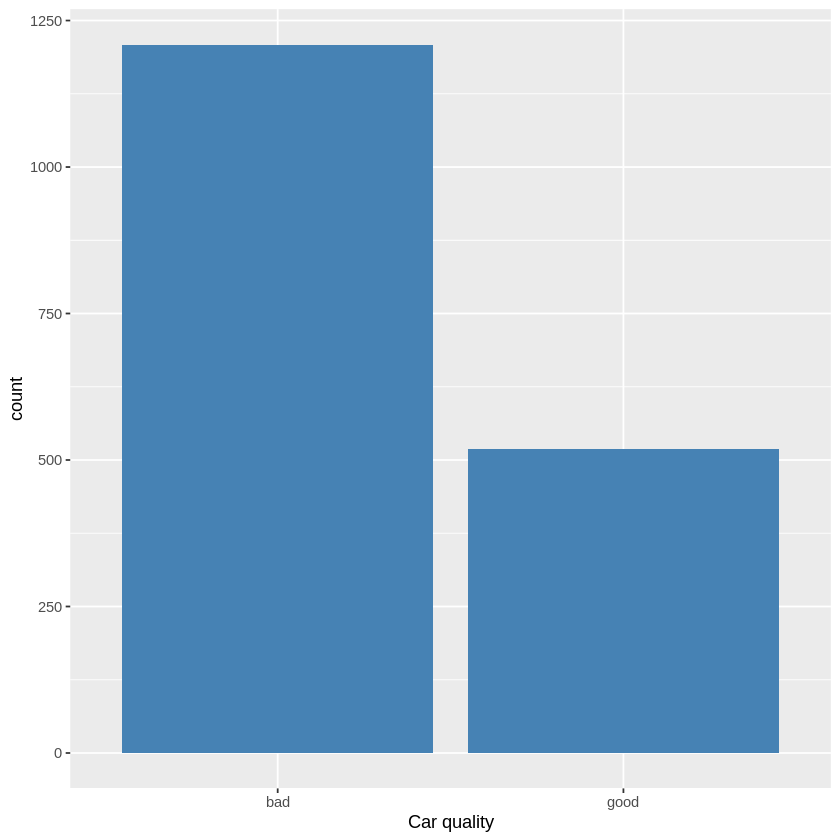

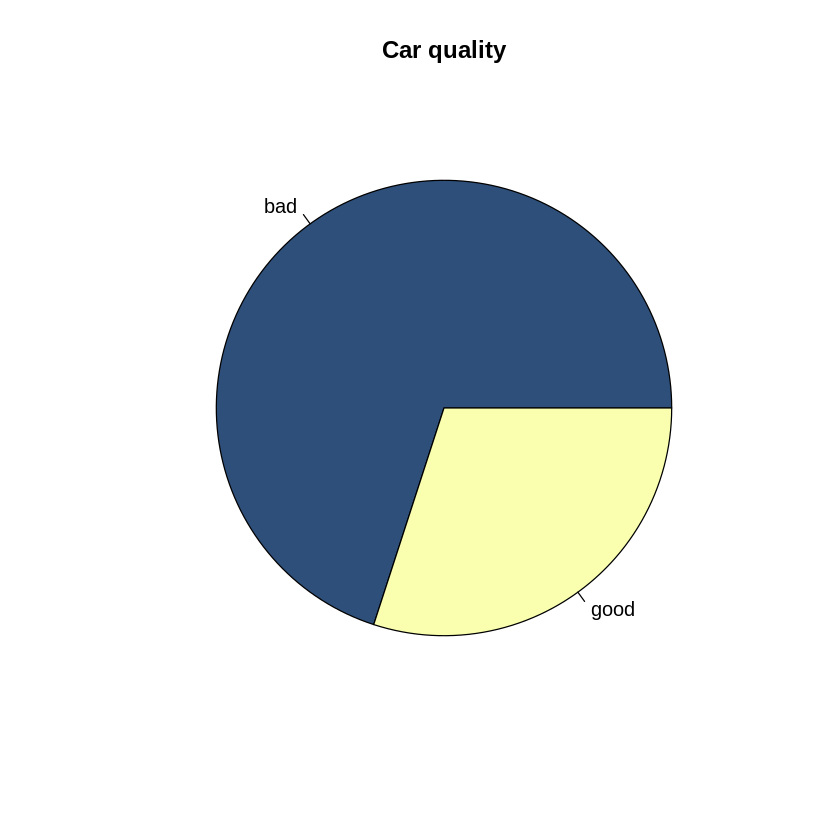

In [29]:
car_new$Quality<- as.factor(car_new$Quality)

ggplot(car_new, aes(x=reorder(Quality, Quality, function(x)-length(x)))) +
  geom_bar(fill='steelblue') +
  labs(x='Car quality')

pie(table(car_new$Quality),
    col = hcl.colors(length(table(car_new$Quality)), "BluYl"), main = "Car quality")

From the diagrams above, we can see that there are about twice as many bad cars than good cars! 

Building the model will really help narrow down consumers' options by removing less optimal cars.

WHAT MAKES A GOOD CAR AND A BAD CAR?

We can use stacked bar graphs to explore the relationships between the quality of a car and the various factors in the data. 

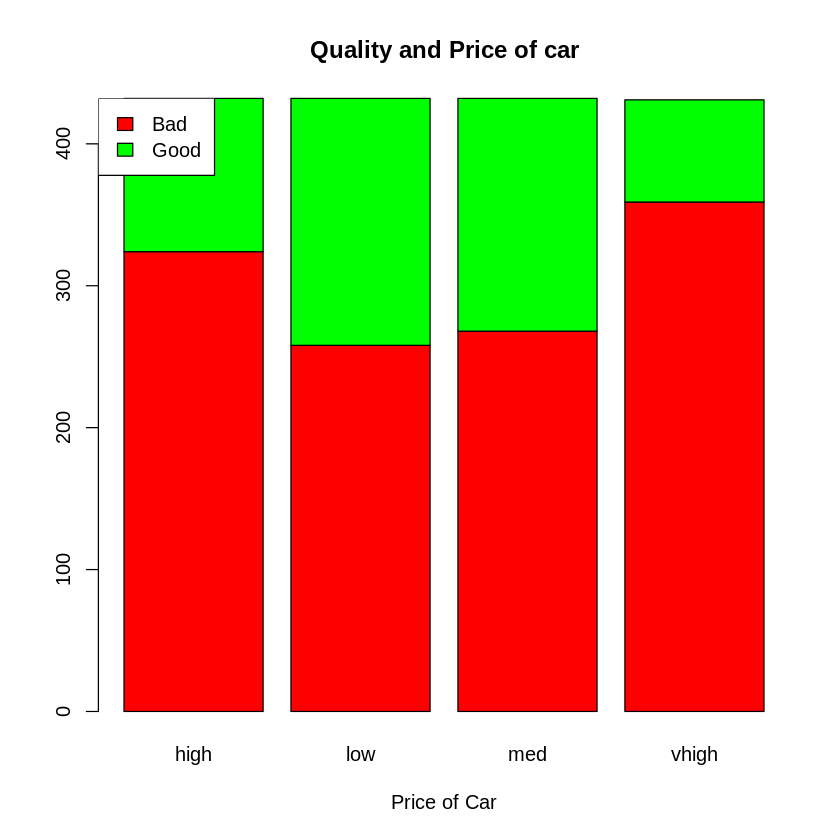

In [61]:
barplot(table(car_new$Quality, car_new$`Price of car`),
main = "Quality and Price of car",
xlab = "Price of Car",
col = c("red","green")
)
legend("topleft",
c("Bad","Good"),
fill = c("red","green")
)


Observation: The higher the price of the car, the more likely it is to be classified as a "bad" car. 

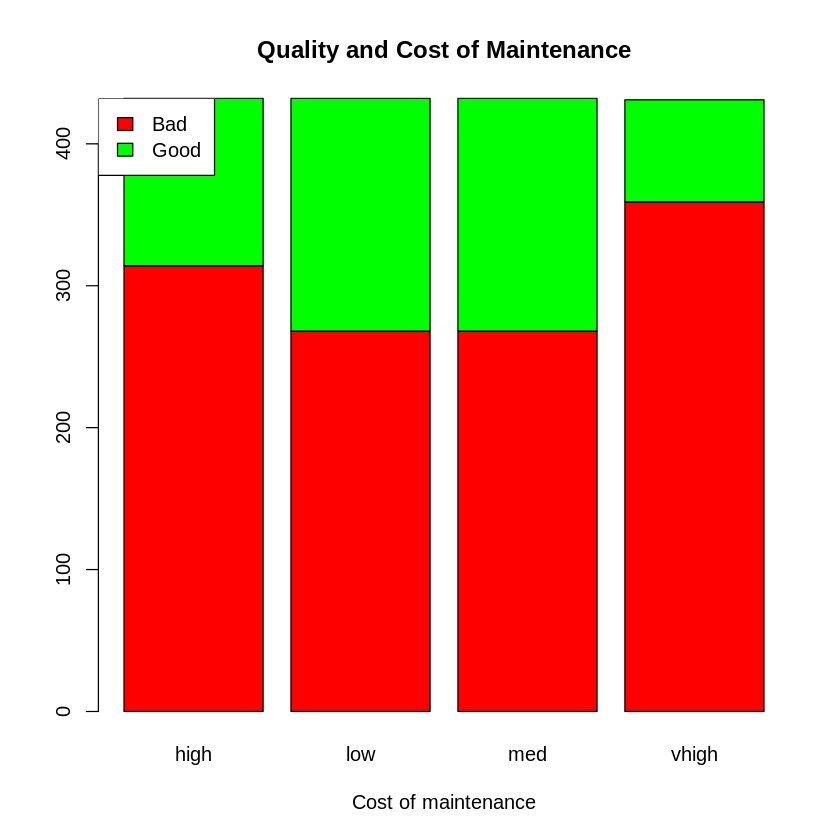

In [33]:
barplot(table(car_new$Quality, car_new$`Cost of maintenance`),
main = "Quality and Cost of Maintenance",
xlab = "Cost of maintenance",
col = c("red","green")
)
legend("topleft",
c("Bad","Good"),
fill = c("red","green")
)


Observation:
The higher the cost of maintenance, the more likely it is to be a "bad" car. 

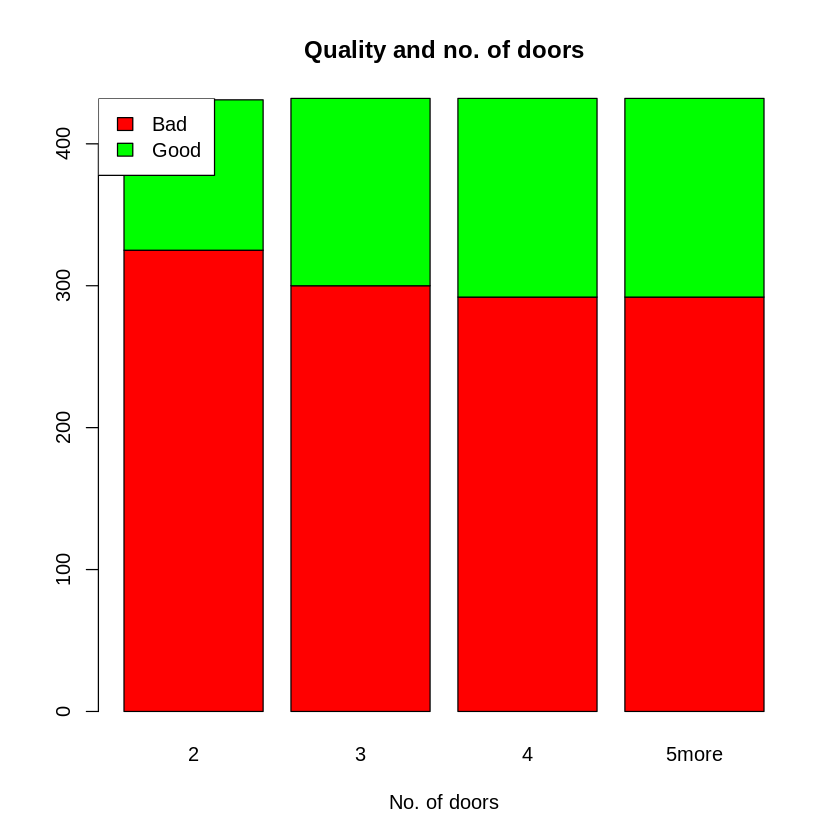

In [36]:
barplot(table(car_new$Quality, car_new$`No. of doors`),
main = "Quality and no. of doors",
xlab = "No. of doors",
col = c("red","green")
)
legend("topleft",
c("Bad","Good"),
fill = c("red","green")
)

Observation: The lower the number of doors, the higher chance of the car being seen as "bad". The number of doors has no effect on car quality from 4 doors onwards. 

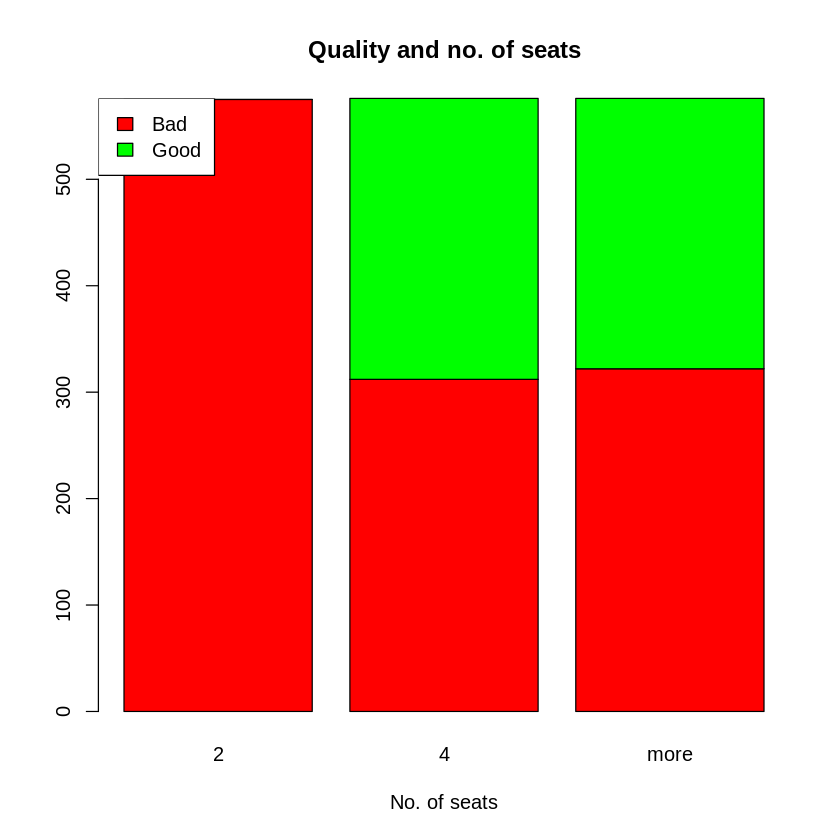

In [37]:
barplot(table(car_new$Quality, car_new$`No. of seats`),
main = "Quality and no. of seats",
xlab = "No. of seats",
col = c("red","green")
)
legend("topleft",
c("Bad","Good"),
fill = c("red","green")
)

Observation: All cars with 2 seats are "bad". 4-seater cars are preferred to 4 or more seat cars. 

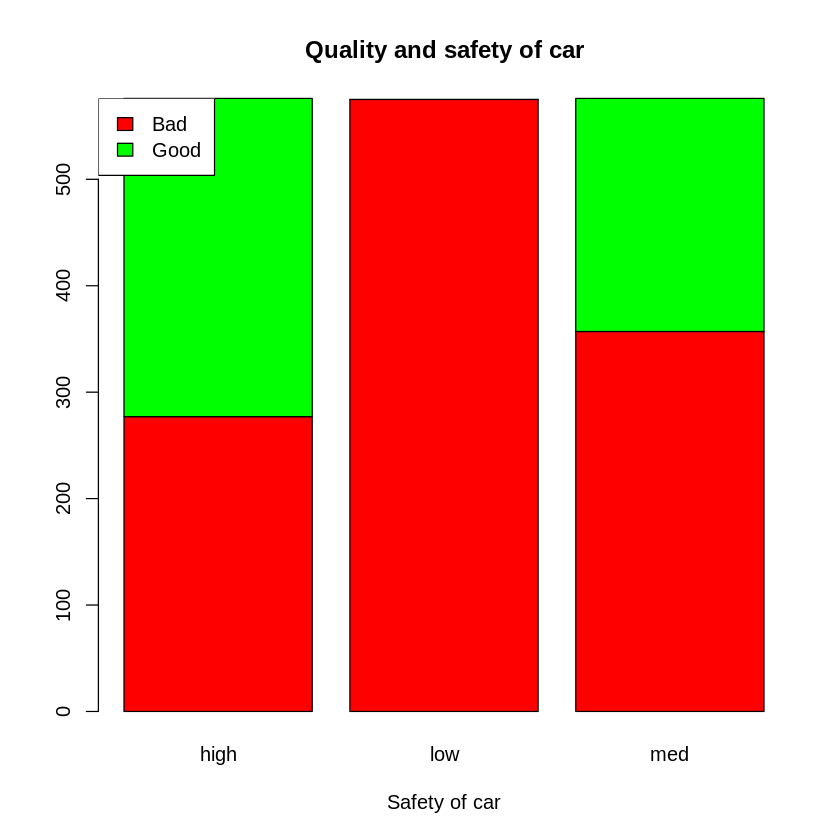

In [38]:
barplot(table(car_new$Quality, car_new$`Safety of car`),
main = "Quality and safety of car",
xlab = "Safety of car",
col = c("red","green")
)
legend("topleft",
c("Bad","Good"),
fill = c("red","green")
)

Observation: The higher the safety of the car, the higher chance of it being "good" quality. 

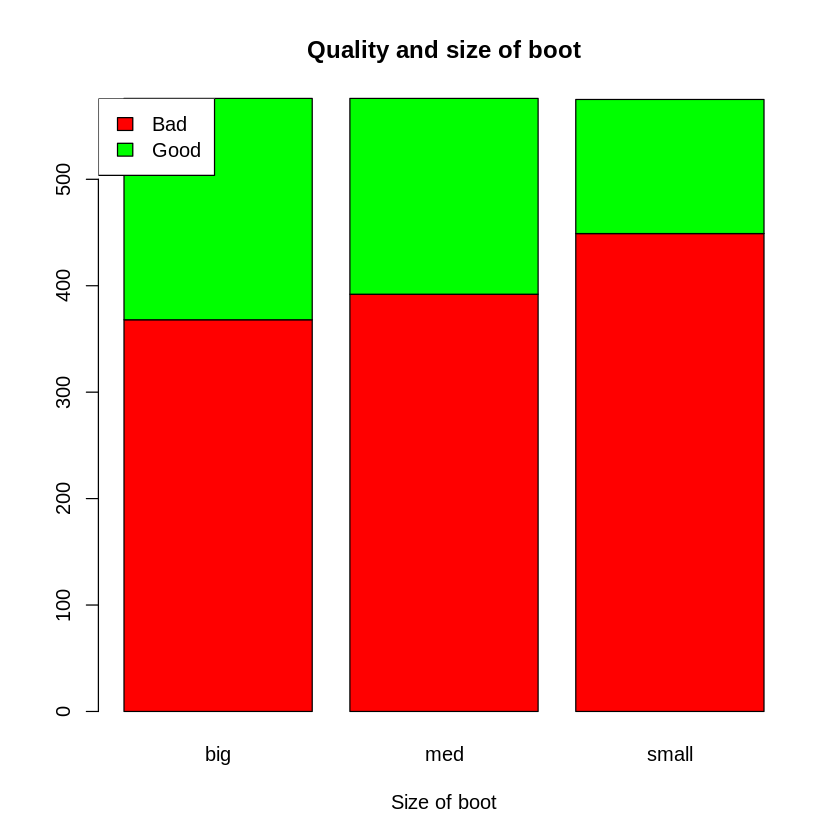

In [39]:
barplot(table(car_new$Quality, car_new$`Size of boot`),
main = "Quality and size of boot",
xlab = "Size of boot",
col = c("red","green")
)
legend("topleft",
c("Bad","Good"),
fill = c("red","green")
)

Observation: The bigger the boot, the higher chance of the car being "good". 

DATA WRANGLING

After exploring the data, we can now move on to building the model. We start by preparing the data thoroughly. 

The data frame is not randomly ordered, which would cause problems later on when I split the data into training and testing data sets. I rearrange the data frame and check the rearranged data frame to ensure it has been shuffled properly. 

In [ ]:
set.seed(12345)
car_rand <- car_new[order(runif(1727)), ]

car_rand

I wanted to find a testing and training split that yielded the most similar numbers of bad and good cars between both datasets. This was to ensure as minimal a difference between the accuracy rates when using the model on the respective data sets. 

I tried 90-10, 80-20 and 70-30. The 70-30 split was the best. 

In [63]:
car_train90 <- car_rand[1:1554, ]
car_test10 <- car_rand[1555:1727, ]

prop.table(table(car_train90$Quality))
prop.table(table(car_test10$Quality))



car_train80 <- car_rand[1:1382, ]
car_test20 <- car_rand[1383:1727, ]

prop.table(table(car_train80$Quality))
prop.table(table(car_test20$Quality))



car_train70 <- car_rand[1:1209, ]
car_test30 <- car_rand[1210:1727, ]

prop.table(table(car_train70$Quality))
prop.table(table(car_test30$Quality))


      bad      good 
0.6956242 0.3043758 


      bad      good 
0.7398844 0.2601156 


      bad      good 
0.6924747 0.3075253 


      bad      good 
0.7304348 0.2695652 


      bad      good 
0.6956162 0.3043838 


      bad      good 
0.7104247 0.2895753 

MODELLING

I train a model using the training dataset and check the accuracy rate - 98.8%!

In [64]:
car_model <- C5.0(car_train70[-7], car_train70$Quality)
summary(car_model)


Call:
C5.0.default(x = car_train70[-7], y = car_train70$Quality)


C5.0 [Release 2.07 GPL Edition]  	Fri Apr 14 23:18:28 2023
-------------------------------

Class specified by attribute `outcome'

Read 1209 cases (7 attributes) from undefined.data

Decision tree:

No. of seats = 2: bad (414)
No. of seats in {more,4}:
:...Safety of car = low: bad (269)
    Safety of car in {high,med}:
    :...Price of car in {med,low}:
        :...Size of boot in {med,big}: good (176/6)
        :   Size of boot = small:
        :   :...No. of doors in {4,3,5more}:
        :       :...Safety of car = high: good (36)
        :       :   Safety of car = med:
        :       :   :...Cost of maintenance in {med,high,low}: good (22/2)
        :       :       Cost of maintenance = vhigh: bad (10)
        :       No. of doors = 2:
        :       :...No. of seats = more: bad (13)
        :           No. of seats = 4:
        :           :...Safety of car = high: good (4)
        :               Safety of car

I apply the decision tree to the test dataset, and evaluate its performance using the table. It is 97.3% accurate. 

In [54]:
car_pred <- predict(car_model, car_test30)

CrossTable(car_test30$Quality, car_pred,
prop.chisq = FALSE, prop.c = FALSE, prop.r = FALSE,
dnn = c('actual decision', 'predicted decision'))


 
   Cell Contents
|-------------------------|
|                       N |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  518 

 
                | predicted decision 
actual decision |       bad |      good | Row Total | 
----------------|-----------|-----------|-----------|
            bad |       358 |        10 |       368 | 
                |     0.691 |     0.019 |           | 
----------------|-----------|-----------|-----------|
           good |         4 |       146 |       150 | 
                |     0.008 |     0.282 |           | 
----------------|-----------|-----------|-----------|
   Column Total |       362 |       156 |       518 | 
----------------|-----------|-----------|-----------|

 


To improve performance further, I use adaptive boosting by applying the "trials" parameter in the C50 function. I use the standard number of trials, 10, as it is the de facto standard. After boosting, the training dataset has an accuracy rate of 99.9%.

In [65]:
car_boost10 <- C5.0(car_train70[-7], car_train70$Quality,
trials = 10)


summary(car_boost10)


Call:
C5.0.default(x = car_train70[-7], y = car_train70$Quality, trials = 10)


C5.0 [Release 2.07 GPL Edition]  	Fri Apr 14 23:18:36 2023
-------------------------------

Class specified by attribute `outcome'

Read 1209 cases (7 attributes) from undefined.data

-----  Trial 0:  -----

Decision tree:

No. of seats = 2: bad (414)
No. of seats in {more,4}:
:...Safety of car = low: bad (269)
    Safety of car in {high,med}:
    :...Price of car in {med,low}:
        :...Size of boot in {med,big}: good (176/6)
        :   Size of boot = small:
        :   :...No. of doors in {4,3,5more}:
        :       :...Safety of car = high: good (36)
        :       :   Safety of car = med:
        :       :   :...Cost of maintenance in {med,high,low}: good (22/2)
        :       :       Cost of maintenance = vhigh: bad (10)
        :       No. of doors = 2:
        :       :...No. of seats = more: bad (13)
        :           No. of seats = 4:
        :           :...Safety of car = high: good (4)


Finally, I boost the test dataset. It yields an accuracy of 98.6%. Boosting has lowered the error rate by half! 

In [66]:
car_boost_pred10 <- predict(car_boost10, car_test30)


CrossTable(car_test30$Quality, car_boost_pred10,
prop.chisq = FALSE, prop.c = FALSE, prop.r = FALSE,
dnn = c('actual decision', 'predicted decision'))


 
   Cell Contents
|-------------------------|
|                       N |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  518 

 
                | predicted decision 
actual decision |       bad |      good | Row Total | 
----------------|-----------|-----------|-----------|
            bad |       364 |         4 |       368 | 
                |     0.703 |     0.008 |           | 
----------------|-----------|-----------|-----------|
           good |         3 |       147 |       150 | 
                |     0.006 |     0.284 |           | 
----------------|-----------|-----------|-----------|
   Column Total |       367 |       151 |       518 | 
----------------|-----------|-----------|-----------|

 


CONCLUSION

The C5.0 decision tree algorithm is very well-suited to classifying cars, as it has achieved high degree of accuracy, at 98.6%!

I believe these results are very encouraging toward the use of machine learning models as a tool to facilitate consumer decision making. Although the model was only tested on cars in this example, I think there are possibilities toward a wide range of applications on similar consumer goods (especially larger purchases like houses). 